In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('wideform.xlsx')

# Currently, the dataframe has "2" as final result when a student withdraws. 
# We're just looking at pass/not pass, so I'm changing those "2"s to "1"s (not pass)
df.loc[df['final_result'] == 2, 'final_result'] = 1

# Feature for change between sum_clicks
df['sum_clicks_change'] = df['sum_click_pre_A2'] / df['sum_click_pre_A1']

df.fillna(0, inplace=True)

df

,code_module,code_presentation,id_student,gender,highest_education,age_band,num_of_prev_attempts,studied_credits,disability,final_result,...,subpage_31-45,subpage_46-60,url_pre-0,url_1-15,url_16-30,url_31-45,url_46-60,sum_click_pre_A1,sum_click_pre_A2,sum_clicks_change
0,AAA,2013J,11391,0,3,2,0,240,0,0,...,1,0,0,1,0,0,0,352.0,175.0,0.497159
1,AAA,2013J,28400,1,3,1,0,60,0,0,...,1,1,10,9,11,1,1,493.0,156.0,0.316430
2,AAA,2013J,31604,1,2,1,0,60,0,0,...,17,3,3,10,8,12,3,390.0,371.0,0.951282
3,AAA,2013J,32885,1,1,0,0,60,0,0,...,0,1,3,0,3,0,0,558.0,64.0,0.114695
4,AAA,2013J,38053,0,2,1,0,60,0,0,...,3,3,1,4,6,2,3,614.0,395.0,0.643322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22434,FFF,2014J,2684048,1,1,0,0,120,0,1,...,1,4,0,3,0,0,0,346.0,41.0,0.118497
22435,FFF,2014J,2686035,1,1,0,0,135,0,1,...,3,19,5,0,1,0,2,431.0,240.0,0.556845
22436,FFF,2014J,2693932,0,2,0,1,120,0,0,...,31,2,3,2,2,1,0,362.0,789.0,2.179558
22437,FFF,2014J,2694139,0,1,1,0,60,0,1,...,3,12,4,0,1,1,2,120.0,669.0,5.575000


In [3]:
df_a = df[df['code_module'] == 'AAA'] # 703 rows
df_b = df[df['code_module'] == 'BBB'] # 5974 rows
df_c = df[df['code_module'] == 'CCC'] # 2444 rows
df_d = df[df['code_module'] == 'DDD'] # 4822 rows
df_e = df[df['code_module'] == 'EEE'] # 2289 rows
df_f = df[df['code_module'] == 'FFF'] # 6207 rows

In [4]:
index_cols = ['code_module', 'code_presentation', 'id_student']
label = ['final_result']
# feature_cols is everything else

# I'm removing date_unregistration, that'll take more thought
not_features = ['code_module', 'code_presentation', 'id_student', 'final_result', 'date_unregistration']
features = [col for col in df.columns if col not in not_features]


In [5]:
def accuracy_by_module(module_df):
    X_train, X_test, y_train, y_test= train_test_split(module_df[features],module_df[label], test_size=0.20)

    y_train = y_train.astype('int').to_numpy().ravel()
    y_test = y_test.astype('int').to_numpy().ravel()

    clf = RandomForestClassifier(n_estimators = 1000, random_state=42)
    clf.fit(X_train, y_train)

    score = clf.score(X_test, y_test)
    importances = list(clf.feature_importances_)
    feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(features, importances)]
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

    probabilities = clf.predict_proba(module_df[features])[:,1]
    module_df['probability'] = clf.predict_proba(module_df[features])[:,1]

    return score, feature_importances, module_df
    
    

In [6]:
a_score, a_top, a_with_proba = accuracy_by_module(df_a)
b_score, b_top, b_with_proba = accuracy_by_module(df_b)
c_score, c_top, c_with_proba = accuracy_by_module(df_c)
d_score, d_top, d_with_proba = accuracy_by_module(df_d)
e_score, e_top, e_with_proba = accuracy_by_module(df_e)
f_score, f_top, f_with_proba = accuracy_by_module(df_f)

full_score, full_top, full_with_proba = accuracy_by_module(df)

In [7]:
print(b_score)
print(c_score)
print(d_score)
print(e_score)
print(f_score)
print("---")
print(full_score)

0.7531380753138075
0.8404907975460123
0.778238341968912
0.8209606986899564
0.7600644122383253
---
0.7896613190730838


In [8]:
a_top[:10]

[('score_A2', 0.077),
 ('weighted_score_A2', 0.0755),
 ('days_from_due_A2', 0.0595),
 ('date_submitted_A2', 0.0586),
 ('weighted_score_A1', 0.0381),
 ('score_A1', 0.0369),
 ('sum_clicks_change', 0.0326),
 ('date_registration', 0.0275),
 ('sum_click_pre_A2', 0.0272),
 ('oucontent_31-45', 0.0267)]

In [9]:
b_top[:10]

[('score_A2', 0.0911),
 ('weighted_score_A2', 0.0669),
 ('days_from_due_A2', 0.0648),
 ('date_submitted_A2', 0.056),
 ('homepage_46-60', 0.0326),
 ('homepage_31-45', 0.0296),
 ('sum_click_pre_A2', 0.0293),
 ('sum_clicks_change', 0.0266),
 ('date_registration', 0.0238),
 ('sum_click_pre_A1', 0.0238)]

In [10]:
c_top[:10]

[('score_A2', 0.1136),
 ('weighted_score_A2', 0.1131),
 ('days_from_due_A2', 0.0616),
 ('date_submitted_A2', 0.0596),
 ('weighted_score_A1', 0.0541),
 ('score_A1', 0.0498),
 ('sum_click_pre_A2', 0.0417),
 ('sum_clicks_change', 0.0408),
 ('homepage_46-60', 0.0202),
 ('sum_click_pre_A1', 0.0188)]

In [11]:
d_top[:10]

[('score_A2', 0.0841),
 ('weighted_score_A2', 0.0771),
 ('score_A1', 0.0509),
 ('date_submitted_A2', 0.0356),
 ('days_from_due_A2', 0.035),
 ('homepage_46-60', 0.0286),
 ('forumng_46-60', 0.0265),
 ('weighted_score_A1', 0.0234),
 ('sum_click_pre_A2', 0.0229),
 ('subpage_46-60', 0.0215)]

In [12]:
e_top[:10]

[('score_A2', 0.0932),
 ('weighted_score_A2', 0.091),
 ('date_submitted_A2', 0.0655),
 ('days_from_due_A2', 0.0651),
 ('weighted_score_A1', 0.0387),
 ('score_A1', 0.0362),
 ('sum_click_pre_A2', 0.0319),
 ('sum_clicks_change', 0.0315),
 ('oucontent_46-60', 0.027),
 ('homepage_46-60', 0.0267)]

In [13]:
f_top[:10]

[('weighted_score_A2', 0.0767),
 ('score_A2', 0.0735),
 ('days_from_due_A2', 0.0408),
 ('date_submitted_A2', 0.0389),
 ('homepage_46-60', 0.0339),
 ('sum_click_pre_A2', 0.0315),
 ('oucontent_46-60', 0.0266),
 ('subpage_46-60', 0.0257),
 ('homepage_31-45', 0.0253),
 ('oucontent_31-45', 0.0236)]

In [14]:
full_top[:10]

[('score_A2', 0.096),
 ('weighted_score_A2', 0.0799),
 ('days_from_due_A2', 0.0553),
 ('date_submitted_A2', 0.0471),
 ('score_A1', 0.0356),
 ('sum_click_pre_A2', 0.0301),
 ('homepage_46-60', 0.0299),
 ('sum_clicks_change', 0.0257),
 ('homepage_31-45', 0.0233),
 ('sum_click_pre_A1', 0.0201)]

In [15]:
a_with_proba

,code_module,code_presentation,id_student,gender,highest_education,age_band,num_of_prev_attempts,studied_credits,disability,final_result,...,subpage_46-60,url_pre-0,url_1-15,url_16-30,url_31-45,url_46-60,sum_click_pre_A1,sum_click_pre_A2,sum_clicks_change,probability
0,AAA,2013J,11391,0,3,2,0,240,0,0,...,0,0,1,0,0,0,352.0,175.0,0.497159,0.052
1,AAA,2013J,28400,1,3,1,0,60,0,0,...,1,10,9,11,1,1,493.0,156.0,0.316430,0.054
2,AAA,2013J,31604,1,2,1,0,60,0,0,...,3,3,10,8,12,3,390.0,371.0,0.951282,0.007
3,AAA,2013J,32885,1,1,0,0,60,0,0,...,1,3,0,3,0,0,558.0,64.0,0.114695,0.258
4,AAA,2013J,38053,0,2,1,0,60,0,0,...,3,1,4,6,2,3,614.0,395.0,0.643322,0.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,AAA,2014J,2680312,0,3,2,0,60,0,0,...,12,3,20,20,12,10,791.0,866.0,1.094817,0.121
699,AAA,2014J,2688166,0,1,1,0,60,0,0,...,8,0,13,5,2,4,276.0,206.0,0.746377,0.090
700,AAA,2014J,2690062,1,2,1,0,120,0,1,...,0,0,2,2,0,0,227.0,30.0,0.132159,0.968
701,AAA,2014J,2692514,0,1,1,0,120,0,0,...,8,0,0,0,0,0,1743.0,1372.0,0.787149,0.060


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C0D8795F10>]],
      dtype=object)

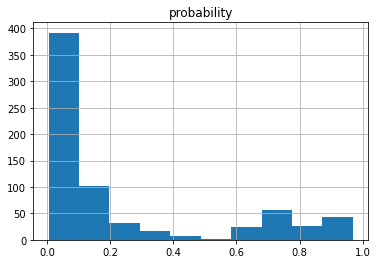

In [16]:
a_with_proba.hist(column='probability')